In [1]:
import os
import sklearn
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn import metrics
from skimage.feature import hog
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin

In [3]:
import tensorflow as tf


In [4]:
df = pd.read_csv('train.csv')
print(df.columns.values)

['id' 'v1' 'v2' 'v3' 'v4' 'v5' 'v6' 'v7' 'v8' 'v9' 'v10' 'v11' 'v12' 'v13'
 'v14' 'v15' 'v16' 'v17' 'v18' 'v19' 'v20' 'v21' 'v22' 'v23' 'v24' 'v25'
 'v26' 'v27' 'v28' 'v29' 'v30' 'v31' 'v32' 'v33' 'v34' 'v35' 'v36' 'v37'
 'v38' 'v39' 'v40' 'v41' 'v42' 'v43' 'v44' 'v45' 'v46' 'v47' 'v48' 'v49'
 'v50' 'v51' 'v52' 'v53' 'v54' 'v55' 'v56' 'v57' 'v58' 'v59' 'v60' 'v61'
 'v62' 'v63' 'v64' 'v65' 'v66' 'v67' 'v68' 'v69' 'v70' 'v71' 'v72' 'v73'
 'v74' 'v75' 'v76' 'v77' 'v78' 'v79' 'v80' 'v81' 'v82' 'v83' 'v84' 'v85'
 'v86' 'v87' 'v88' 'v89' 'v90' 'v91' 'v92' 'v93' 'v94' 'v95' 'v96' 'v97'
 'v98' 'v99' 'v100' 'v101' 'v102' 'v103' 'v104' 'v105' 'v106' 'v107'
 'v108' 'v109' 'v110' 'v111' 'v112' 'v113' 'v114' 'v115' 'v116' 'v117'
 'v118' 'v119' 'v120' 'v121' 'v122' 'v123' 'v124' 'v125' 'v126' 'v127'
 'v128' 'v129' 'v130' 'v131' 'v132' 'v133' 'v134' 'v135' 'v136' 'v137'
 'v138' 'v139' 'v140' 'v141' 'v142' 'v143' 'v144' 'v145' 'v146' 'v147'
 'v148' 'v149' 'v150' 'v151' 'v152' 'v153' 'v154' 'v155' 'v15

In [5]:

X_df = df.drop(columns=['id','glasses'])
X = X_df.to_numpy()
y = df['glasses'].to_numpy()

count_zero = [i for i in y if i == 0 ]
count_one = [i for i in y if i == 1]

count_sum = len(count_zero)+len(count_one)

print(len(count_zero)/count_sum,len(count_one)/count_sum)

0.36533333333333334 0.6346666666666667


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=int(500), random_state=51)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
latent_vector_models = [LogisticRegression(), SVC(), MLPClassifier()]

for model in latent_vector_models:
    clf = make_pipeline(StandardScaler(), model)
    clf.fit(X_train, y_train)
    print(f"f1score : {metrics.f1_score(y_test, clf.predict(X_test))}")


f1score : 0.9952305246422893
f1score : 1.0
f1score : 0.9968152866242038


In [8]:
import pickle

def load_image(path):
    with open(path, 'rb') as f:
        image = Image.open(f).resize((96,96))
    return np.array(image)

# pickle_data need to be true for first time
pickle_data = False

if pickle_data:

    image_dir = os.path.join(os.getcwd(),'faces-spring-2020','faces-spring-2020')

    image_data = list()

    for i in range(1, len(X)+1):
        image_name = 'face-'+ str(i)+ '.png' 
        cur_path = os.path.join(image_dir,image_name)
        image_data.append(load_image(cur_path))
        if i % 500 == 0 and (i!=0):
            print(i)

    image_data = np.array(image_data)
    with open('image_data.pkl', 'wb') as f:
        pickle.dump(image_data,f)
else:
    with open('image_data.pkl', 'rb') as f:
        image_data =pickle.load(f)

In [9]:
print(len(image_data))
print(len(image_data[0]))
print(image_data.shape)

4500
96
(4500, 96, 96, 3)


In [10]:
class hogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass   


    def fit(self,X, y):
        return self
    
    def transform(self,X):
        def localhog(image):
            return hog(image, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3), channel_axis=-1)

        return np.array([localhog(i) for i in X])



In [12]:
image_vis_hog = [hog(i, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(3, 3), channel_axis=-1, visualize=True)[1] for i in image_data]
image_vis_hog = np.array(image_vis_hog)
print(image_vis_hog.shape)

(4500, 96, 96)


(7200,)


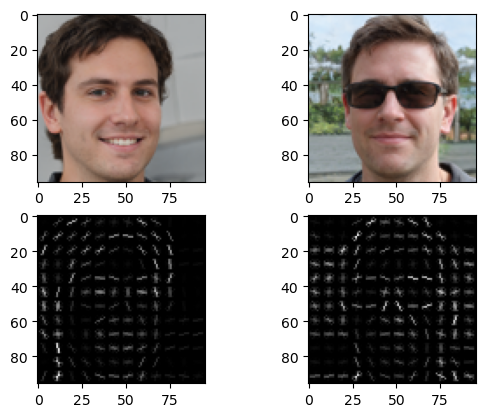

In [13]:
hog_plt = hog(image_data[0], orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3),visualize=True, channel_axis=-1,)


print(hog_plt[0].shape)
plt.subplot(2,2,1)
plt.imshow(image_data[0])
plt.subplot(2,2,2)
plt.imshow(image_data[1])

plt.subplot(2,2,3)
plt.imshow(hog_plt[1],'gray')
hog_plt = hog(image_data[1], orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3),visualize=True, channel_axis=-1,)
plt.subplot(2,2,4)
plt.imshow(hog_plt[1],'gray')
plt.show()



In [14]:
X_train, X_test, y_train, y_test = train_test_split(image_data,y, test_size=int(500), random_state=51)

In [15]:
def grid_search_model(model, model_para, X, y):
    print(f"gridseraching model: {model}")
    print(f"parameter: {model_para}")
    model_pipeline = Pipeline([('hog', hogTransformer()), ('scaler', StandardScaler()), ('model', model)])
    clf = GridSearchCV(model_pipeline, model_para, scoring='f1',verbose=1)
    clf.fit(X,y)
    print(f"f1score : {clf.best_score_}")
    return (clf.best_estimator_)

if __name__ == '__main__':
    models = [SGDClassifier(loss='modified_huber'),KNeighborsClassifier(n_neighbors=2)]
    model_paras = [ [{'model__alpha': [0.0001, 0.001, 0.1]}], \
                   
                   [{'model__n_neighbors': [2, 3, 4, 5]}] \
                   ]
    
    best_models = []
    for i in range(len(models)):
        best_models.append(grid_search_model(models[i], model_paras[i], X_train,y_train))
                  

gridseraching model: SGDClassifier(loss='modified_huber')
parameter: [{'model__alpha': [0.0001, 0.001, 0.1]}]
Fitting 5 folds for each of 3 candidates, totalling 15 fits
f1score : 0.8878111295119939
gridseraching model: KNeighborsClassifier(n_neighbors=2)
parameter: [{'model__n_neighbors': [2, 3, 4, 5]}]
Fitting 5 folds for each of 4 candidates, totalling 20 fits
f1score : 0.8932280186024503
model: MLPClassifier()
validation mean acc: 0.9048888888888889
validation f1score: 0.9302931596091205


In [16]:
def validate_model_image(model, X, y):
    
    
    clf = model
    print(f"model: {clf}")
    clf.fit(X_train, y_train)
    print(f"validation mean acc: {clf.score(X,y)}")
    print(f"validation f1score: {metrics.f1_score(y, clf.predict(X))}")

if __name__ == '__main__':
    
    
    models = best_models
    
    print(f"number of models: {len(models)}")

    for model in models :
        with np.errstate(divide='ignore',invalid='ignore'):
            validate_model_image(model, X_test, y_test)
        print("\n")


number of models: 2
model: Pipeline(steps=[('hog', hogTransformer()), ('scaler', StandardScaler()),
                ('model', SGDClassifier(loss='modified_huber'))])
validation mean acc: 0.844
validation f1score: 0.8792569659442724


model: Pipeline(steps=[('hog', hogTransformer()), ('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=4))])
validation mean acc: 0.846
validation f1score: 0.8743882544861338




In [17]:
from tensorflow.keras import layers, models
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [18]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', f1_m])


train_images, test_images, train_labels, test_labels = train_test_split(image_data, y, test_size=0.5, random_state=51)

#print(train_images.shape)

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
71/71 [==============================] - 6s 39ms/step - loss: 10.3001 - accuracy: 0.6547 - f1_m: 0.3362 - val_loss: 0.5053 - val_accuracy: 0.7680 - val_f1_m: 0.6873
Epoch 2/10
71/71 [==============================] - 2s 29ms/step - loss: 0.4200 - accuracy: 0.7987 - f1_m: 0.4413 - val_loss: 0.3351 - val_accuracy: 0.8724 - val_f1_m: 0.6192
Epoch 3/10
71/71 [==============================] - 2s 29ms/step - loss: 0.2966 - accuracy: 0.8853 - f1_m: 0.6263 - val_loss: 0.3136 - val_accuracy: 0.8778 - val_f1_m: 0.6610
Epoch 4/10
71/71 [==============================] - 2s 27ms/step - loss: 0.2856 - accuracy: 0.8853 - f1_m: 0.6271 - val_loss: 0.3836 - val_accuracy: 0.8107 - val_f1_m: 0.8503
Epoch 5/10
71/71 [==============================] - 2s 27ms/step - loss: 0.2781 - accuracy: 0.8876 - f1_m: 0.7712 - val_loss: 0.3155 - val_accuracy: 0.8787 - val_f1_m: 0.7451
Epoch 6/10
71/71 [==============================] - 2s 28ms/step - loss: 0.2160 - accuracy: 0.9178 - f1_m: 0.7265 - val_loss

71/71 - 1s - loss: 0.3869 - accuracy: 0.8773 - f1_m: 0.7875


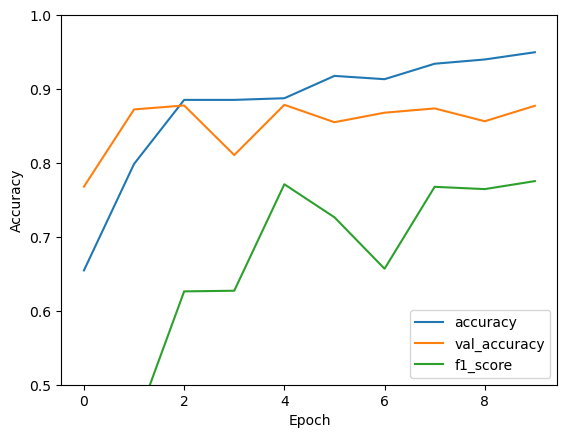

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['f1_m'], label='f1_score' )
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc,test_f1 = model.evaluate(test_images, test_labels, verbose=2)

In [20]:
model_hog = tf.keras.models.Sequential()
model_hog.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
model_hog.add(layers.MaxPooling2D((2, 2)))
model_hog.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_hog.add(layers.MaxPooling2D((2, 2)))
model_hog.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_hog.add(layers.Flatten())
model_hog.add(layers.Dense(64, activation='relu'))
model_hog.add(layers.Dense(2))

model_hog.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [21]:
model_hog.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', f1_m])

image_vis_hog = [i.reshape((96,96,1)) for i in image_vis_hog]
image_vis_hog = np.array(image_vis_hog)

train_images, test_images, train_labels, test_labels = train_test_split(image_vis_hog, y, test_size=int(500), random_state=51)

print(train_images.shape)

history = model_hog.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

(4000, 96, 96, 1)
Epoch 1/10
125/125 [==============================] - 4s 27ms/step - loss: 0.8003 - accuracy: 0.8213 - f1_m: 0.7153 - val_loss: 0.3319 - val_accuracy: 0.8660 - val_f1_m: 0.7929
Epoch 2/10
125/125 [==============================] - 3s 23ms/step - loss: 0.2753 - accuracy: 0.8885 - f1_m: 0.7575 - val_loss: 0.3077 - val_accuracy: 0.8620 - val_f1_m: 0.7507
Epoch 3/10
125/125 [==============================] - 3s 23ms/step - loss: 0.2494 - accuracy: 0.9022 - f1_m: 0.7576 - val_loss: 0.3259 - val_accuracy: 0.8700 - val_f1_m: 0.7559
Epoch 4/10
125/125 [==============================] - 3s 22ms/step - loss: 0.2333 - accuracy: 0.9078 - f1_m: 0.7548 - val_loss: 0.3193 - val_accuracy: 0.8680 - val_f1_m: 0.7990
Epoch 5/10
125/125 [==============================] - 3s 22ms/step - loss: 0.2158 - accuracy: 0.9180 - f1_m: 0.7539 - val_loss: 0.3586 - val_accuracy: 0.8480 - val_f1_m: 0.6646
Epoch 6/10
125/125 [==============================] - 3s 22ms/step - loss: 0.1963 - accuracy: 0.9

16/16 - 0s - loss: 0.3905 - accuracy: 0.8580 - f1_m: 0.7645


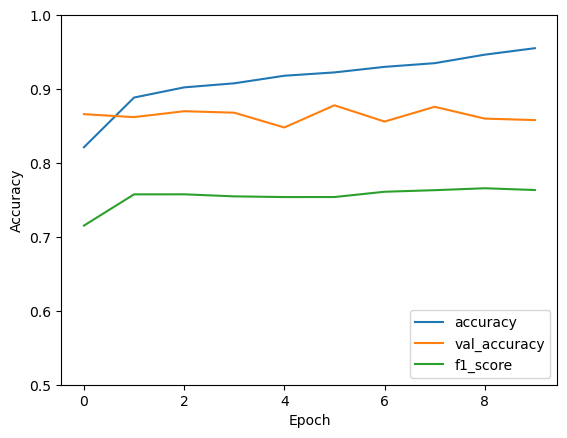

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['f1_m'], label='f1_score' )
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc,test_f1 = model_hog.evaluate(test_images,  test_labels, verbose=2)